In [2]:
from datasets import load_dataset

dataset = load_dataset("hungnm/multilingual-amazon-review-sentiment-processed")

In [3]:


desired_features = ['stars', 'text', 'language']
reduced_dataset = dataset.select_columns(desired_features)

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['stars', 'text', 'language', 'label', 'len', 'valid', 'input_ids', 'attention_mask'],
        num_rows: 1325529
    })
    validation: Dataset({
        features: ['stars', 'text', 'language', 'label', 'len', 'valid', 'input_ids', 'attention_mask'],
        num_rows: 47490
    })
    test: Dataset({
        features: ['stars', 'text', 'language', 'label', 'len', 'valid', 'input_ids', 'attention_mask'],
        num_rows: 47488
    })
})

In [5]:
reduced_dataset

DatasetDict({
    train: Dataset({
        features: ['stars', 'text', 'language'],
        num_rows: 1325529
    })
    validation: Dataset({
        features: ['stars', 'text', 'language'],
        num_rows: 47490
    })
    test: Dataset({
        features: ['stars', 'text', 'language'],
        num_rows: 47488
    })
})

In [6]:
train= reduced_dataset['train']
test= reduced_dataset['test']
val= reduced_dataset['validation']

In [7]:
set(list(val['stars']))

{1, 2, 4, 5}

In [8]:
def remap_labels(example):
    class_mapping = {1: 0, 2: 1, 4: 2, 5: 3}
    example['stars'] = class_mapping.get(example['stars'])  
    return example

train = train.map(remap_labels)
val = val.map(remap_labels)
test = test.map(remap_labels)


In [9]:
set(list(test['stars']))

{0, 1, 2, 3}

In [10]:

languages_train=set(list(test['language']))
languages_test=set(list(train['language']))
languages_val=set(list(val['language']))


In [11]:
languages_train,languages_test,languages_val

({'de', 'en', 'es', 'fr', 'ja', 'zh'},
 {'de', 'en', 'es', 'fr', 'ja', 'zh'},
 {'de', 'en', 'es', 'fr', 'ja', 'zh'})

In [12]:
# English, Japanese, German, French, Chinese and Spanish

In [13]:

de_train=train.filter(lambda example: example['language']=='de')
en_train=train.filter(lambda example: example['language']=='en')
fr_train=train.filter(lambda example: example['language']=='fr')
es_train=train.filter(lambda example: example['language']=='es')
ja_train=train.filter(lambda example: example['language']=='ja')
zh_train=train.filter(lambda example: example['language']=='zh')

de_test=test.filter(lambda example: example['language']=='de')
en_test=test.filter(lambda example: example['language']=='en')
fr_test=test.filter(lambda example: example['language']=='fr')
es_test=test.filter(lambda example: example['language']=='es')
ja_test=test.filter(lambda example: example['language']=='ja')
zh_test=test.filter(lambda example: example['language']=='zh')

de_val=val.filter(lambda example: example['language']=='de')
en_val=val.filter(lambda example: example['language']=='en')
fr_val=val.filter(lambda example: example['language']=='fr')
es_val=val.filter(lambda example: example['language']=='es')
ja_val=val.filter(lambda example: example['language']=='ja')
zh_val=val.filter(lambda example: example['language']=='zh')



In [14]:
de_train

Dataset({
    features: ['stars', 'text', 'language'],
    num_rows: 218695
})

In [15]:
de_train_lang=set(list(de_train['language']))
en_train_lang=set(list(en_train['language']))
fr_train_lang=set(list(fr_train['language']))
es_train_lang=set(list(es_train['language']))
ja_train_lang=set(list(ja_train['language']))
zh_train_lang=set(list(zh_train['language']))

de_test_lang=set(list(de_test['language']))
en_test_lang=set(list(en_test['language']))
fr_test_lang=set(list(fr_test['language']))
es_test_lang=set(list(es_test['language']))
ja_test_lang=set(list(ja_test['language']))
zh_test_lang=set(list(zh_test['language']))

de_val_lang=set(list(de_val['language']))
en_val_lang=set(list(en_val['language']))
fr_val_lang=set(list(fr_val['language']))
es_val_lang=set(list(es_val['language']))
ja_val_lang=set(list(ja_val['language']))
zh_val_lang=set(list(zh_val['language']))


In [16]:
de_train_lang,en_train_lang,fr_train_lang,es_train_lang,ja_train_lang,zh_train_lang


({'de'}, {'en'}, {'fr'}, {'es'}, {'ja'}, {'zh'})

In [17]:
de_test_lang,en_test_lang,fr_test_lang,es_test_lang,ja_test_lang,zh_test_lang


({'de'}, {'en'}, {'fr'}, {'es'}, {'ja'}, {'zh'})

In [18]:
de_val_lang,en_val_lang,fr_val_lang,es_val_lang,ja_val_lang,zh_val_lang

({'de'}, {'en'}, {'fr'}, {'es'}, {'ja'}, {'zh'})

In [19]:
columns_needed=['stars', 'text']
de_train = de_train.select_columns(columns_needed)
en_train = en_train.select_columns(columns_needed)
fr_train = fr_train.select_columns(columns_needed)
es_train = es_train.select_columns(columns_needed)
ja_train = ja_train.select_columns(columns_needed)
zh_train = zh_train.select_columns(columns_needed)



In [20]:
de_test = de_test.select_columns(columns_needed)
en_test = en_test.select_columns(columns_needed)
fr_test = fr_test.select_columns(columns_needed)
es_test = es_test.select_columns(columns_needed)
ja_test = ja_test.select_columns(columns_needed)
zh_test = zh_test.select_columns(columns_needed)


In [21]:
de_val = de_val.select_columns(columns_needed)
en_val = en_val.select_columns(columns_needed)
fr_val = fr_val.select_columns(columns_needed)
es_val = es_val.select_columns(columns_needed)
ja_val = ja_val.select_columns(columns_needed)
zh_val = zh_val.select_columns(columns_needed)


In [22]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, truncation=True, padding='max_length', max_length=self.max_length, return_tensors='pt')
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }



In [23]:
tokenizer = BertTokenizer.from_pretrained('hfl/chinese-bert-wwm-ext')

In [24]:


from collections import defaultdict
import random
max_length=512
train_dataset = CustomDataset(zh_train['text'], zh_train['stars'], tokenizer, max_length)



from torch.utils.data import random_split, DataLoader

# Define the desired number of entries
desired_num_entries = 50000


# Split the train dataset to get the desired number of entries
train_dataset_subset, _ = random_split(train_dataset, [desired_num_entries, len(train_dataset) - desired_num_entries])

val_dataset = CustomDataset(zh_val['text'], zh_val['stars'], tokenizer, max_length)
test_dataset = CustomDataset(zh_test['text'], zh_test['stars'], tokenizer, max_length)
from torch.utils.data import Dataset, DataLoader

train_loader = DataLoader(train_dataset_subset, batch_size=16*4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16*4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16*4, shuffle=False)



In [25]:
from collections import defaultdict
import random
from torch.utils.data import Subset

from torch.utils.data import random_split, DataLoader

# Define the desired number of entries
desired_num_entries = 50000

# Define a dictionary to store indices for each class
class_indices = defaultdict(list)

# Populate the dictionary with indices for each class
for idx, label in enumerate(de_train['stars']):
    class_indices[label].append(idx)

# Sample an equal number of entries from each class
sampled_indices = []
for label, indices in class_indices.items():
    sampled_indices.extend(random.sample(indices, desired_num_entries // len(class_indices)))

# Create a subset of the train dataset with the sampled indices
train_dataset_subset = Subset(train_dataset, sampled_indices)

# Create DataLoaders for train, validation, and test datasets
train_loader = DataLoader(train_dataset_subset, batch_size=16 * 4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16 * 4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16 * 4, shuffle=False)


In [26]:
from collections import Counter

# Initialize a Counter to count the occurrences of each label
label_counter = Counter()

# Iterate through the train_dataset_subset to count labels
for sample in train_dataset_subset:
    label = sample['labels']  # Assuming 'label' is the key for the label in your dataset
    label_counter[label] += 1

# Print the count of each label
print("Label Counts in Train Dataset Subset:")
for label, count in label_counter.items():
    print(f"Label {label}: {count} samples")


Label Counts in Train Dataset Subset:
Label 1: 1 samples
Label 1: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 1: 1 samples
Label 1: 1 samples
Label 2: 1 samples
Label 3: 1 samples
Label 0: 1 samples
Label 0: 1 samples
Label 0: 1 samples
Label 0: 1 samples
Label 1: 1 samples
Label 1: 1 samples
Label 1: 1 samples
Label 0: 1 samples
Label 3: 1 samples
Label 1: 1 samples
Label 0: 1 samples
Label 2: 1 samples
Label 3: 1 samples
Label 1: 1 samples
Label 2: 1 samples
Label 1: 1 samples
Label 2: 1 samples
Label 2: 1 samples
Label 1: 1 samples
Label 2: 1 samples
Label 1: 1 samples
Label 2: 1 samples
Label 0: 1 samples
Label 3: 1 samples
Label 2: 1 samples
Label 2: 1 samples
Label 3: 1 samples
Label 2: 1 samples
Label 0: 1 samples
Label 2: 1 samples
Label 1: 1 samples
Label 1: 1 samples
Label 0: 1 samples
Label 1: 1 samples
Label 2: 1 samples
Label 0: 1 samples
Label 2: 1 samples
Label 3: 1 samples
Label 0: 1 samples
Label 0: 1 samples
Label 1: 1 samples
Label 0: 1 samples
Label 0: 1 s

In [27]:
device = torch.device('cuda')
model = BertForSequenceClassification.from_pretrained('hfl/chinese-bert-wwm-ext', num_labels=4).to(device)



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at hfl/chinese-bert-wwm-ext and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Train Loss: 0.9121222230784424, Validation Loss: 0.9053267159461975, F1 Score: 0.5972289968194688


Epoch 2/3, Train Loss: 0.8151145768744866, Validation Loss: 0.8889172542095184, F1 Score: 0.6002067176683721


Epoch 3/3, Train Loss: 0.7330674354911155, Validation Loss: 0.9184530248641968, F1 Score: 0.6032402376807597


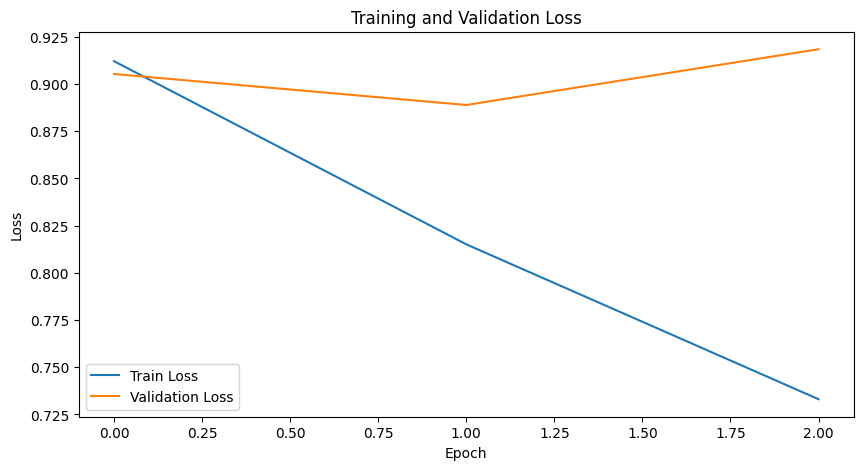

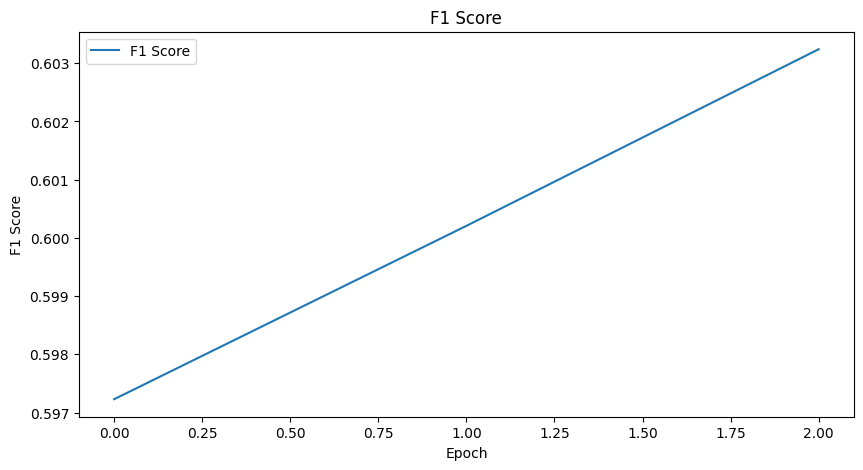

In [28]:
import torch
from tqdm import tqdm
from sklearn.metrics import f1_score

# Define optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Initialize lists to store losses and f1 scores
train_losses = []
val_losses = []
f1_scores = []

num_epochs = 3
for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch', leave=False):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # Compute average training loss for the epoch
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    val_loss = 0.0
    val_predicted = []
    val_labels = []
    with torch.no_grad():
        for batch in tqdm(val_loader, desc='Validation', unit='batch', leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            
            val_loss += loss.item()  # Accumulate validation loss
            
            _, predicted = torch.max(logits, 1)
            val_predicted.extend(predicted.tolist())
            val_labels.extend(labels.tolist())
            
    # Compute average validation loss for the epoch
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    # Compute F1 score for the epoch
    f1 = f1_score(val_labels, val_predicted, average='weighted')
    f1_scores.append(f1)

    # Print epoch results
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Validation Loss: {val_loss}, F1 Score: {f1}")


# Plot training and validation loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot F1 score curve
plt.figure(figsize=(10, 5))
plt.plot(f1_scores, label='F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score')

plt.legend()
plt.show()


In [29]:
# Test
model.eval()
test_predicted = []
test_labels = []
with torch.no_grad():
    for batch in tqdm(test_loader, desc='Testing', unit='batch', leave=False):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        _, predicted = torch.max(logits, 1)
        test_predicted.extend(predicted.tolist())
        test_labels.extend(labels.tolist())

# Compute F1 score for the test data
test_f1 = f1_score(test_labels, test_predicted, average='weighted')

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels, test_predicted)

# Print test F1 score
print(f"Test F1 Score: {test_f1}")
print(f"Test Accuracy: {accuracy}")


Test F1 Score: 0.619382073587914
Test Accuracy: 0.622


In [30]:
# save the model
model.save_pretrained("zh_model")